In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cleaned up data from ETL Project - this file only contains USA gold medal athletes
olympics_file = "Resources/olympics.csv"
olympics = pd.read_csv(olympics_file)
olympics

,id,year,sport,sex,nationality,medal,name
0,0,1976,Aquatics,male,USA,Gold,Philip George Boggs
1,1,1976,Aquatics,female,USA,Gold,Jennifer Kay Chandler
2,2,1976,Aquatics,female,USA,Gold,Shirley Farber Babashoff
3,3,1976,Aquatics,male,USA,Gold,Brian Stuart Goodell
4,4,1976,Aquatics,male,USA,Gold,Matthew Haynes Vogel
...,...,...,...,...,...,...,...
1030,1030,2016,aquatics,male,USA,Gold,Tom Shields
1031,1031,2016,athletics,male,USA,Gold,Tony McQuay
1032,1032,2016,athletics,female,USA,Gold,Tori Bowie
1033,1033,2016,aquatics,male,USA,Gold,Townley Haas


In [3]:
olympics['sex'].value_counts()

male      553
female    482
Name: sex, dtype: int64

In [4]:
# Female athletes only
female = olympics[olympics.sex == "female"]

In [5]:
# Male athletes only
male = olympics[olympics.sex == "male"]

In [6]:
male_count_by_year = male['year'].value_counts()

In [7]:
reset_male = male_count_by_year.reset_index()
reset_male.columns = ['year', 'male']
reset_male

,year,male
0,1984,106
1,2000,68
2,2008,67
3,1996,59
4,1992,57
5,1976,56
6,2004,51
7,1988,49
8,2016,40


In [8]:
female_count_by_year = female['year'].value_counts()

In [9]:
reset_female = female_count_by_year.reset_index()
reset_female.columns = ['year', 'female']
reset_female

,year,female
0,1996,101
1,2016,67
2,2004,65
3,2000,62
4,1984,62
5,2008,58
6,1992,32
7,1988,28
8,1976,7


In [10]:
# Merge the two male and female count by year files for plotting

merge_gender_files = pd.merge(reset_male, reset_female, on="year")
gender_by_year = merge_gender_files

gender_by_year

,year,male,female
0,1984,106,62
1,2000,68,62
2,2008,67,58
3,1996,59,101
4,1992,57,32
5,1976,56,7
6,2004,51,65
7,1988,49,28
8,2016,40,67


In [11]:
gender_by_year.sort_values("year", axis=0, ascending=True, inplace=True, na_position='first')

gender_by_year

,year,male,female
5,1976,56,7
0,1984,106,62
7,1988,49,28
4,1992,57,32
3,1996,59,101
1,2000,68,62
6,2004,51,65
2,2008,67,58
8,2016,40,67


In [12]:
gender_by_year["total"] = gender_by_year.male + gender_by_year.female
gender_by_year

,year,male,female,total
5,1976,56,7,63
0,1984,106,62,168
7,1988,49,28,77
4,1992,57,32,89
3,1996,59,101,160
1,2000,68,62,130
6,2004,51,65,116
2,2008,67,58,125
8,2016,40,67,107


In [13]:
gender_by_year.dtypes

year      int64
male      int64
female    int64
total     int64
dtype: object

In [14]:
# Save the gender_by_year file as a csv file for plotting 
#gender_by_year.to_csv("Resources\genderByYear.csv", index=False)

In [21]:
year_list = gender_by_year['year'].tolist()
year_list

[1976, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2016]

In [22]:
total_list = gender_by_year['total'].tolist()
total_list

[63, 168, 77, 89, 160, 130, 116, 125, 107]

In [23]:
male_list = gender_by_year['male'].tolist()
male_list

[56, 106, 49, 57, 59, 68, 51, 67, 40]

In [24]:
female_list = gender_by_year['female'].tolist()
female_list

[7, 62, 28, 32, 101, 62, 65, 58, 67]

In [28]:
xaxis = total_list
yaxis = year_list

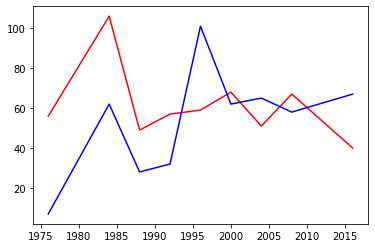

In [38]:
# Plot the charts and apply some styling
male, = plt.plot(year_list, male_list, color="red", label="Male Athletes")
female, = plt.plot(year_list, female_list, color="blue", label="Female Athletes")